# CODE-UP STATISTICS REVIEW

## Goals
- Build on top of the statistics knowledge from the khan academy prework
- Understand how to use the uniform, binomial, poisson, and normal distributions to model real-world scenarios
- Understand in general how hypothesis testing is performed
- Know when to use a t-test, correlation test, and χ2
 test
- Write python code that simulates experiments in order to calculate an experimental probability
- Use various statistical distributions in python through scipy.stats
- Perform hypothesis testing in python code


In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import viz

import warnings
warnings.filterwarnings('ignore')

### Descriptive statistics:
- ##### (1). <u>Measures of Central Tendancy:</u>
    - __Mean__ --> (Average value)
    - __Median__ --> (The center, or middle value.)
    - __Mode__ --> (most frequent)
    - __Bi-modal__ --> (when two values tie for the mode)
    - __Trimmed mean__ --> (average after removing a certain percentage of outliers. Less sensitive to outliers than the mean)
    
- ##### (2). <u>Measures of Spread:</u>
    - __Min__ 
    - __Max__
    - __Range__ --> (delta between max and min)
    - __Mean Absolute Deviation__ --> (average of deviations from a central point)
    - __Quantile__ --> (The cut points that divide a probability distribution into __EQUALLY__ sized continuous intervals)
    - __Quartile__ --> (The cut points on a distrubtion to subdivide it into 4 equally sized intervals are called the quartiles.)
    - __Percentile__ --> (A quantile cut into 100 equally sized intervals)
    - __IQR__ (q1- q4)
    - __Variance__ --> (The average squared distance between each point and the mean) 
    - __Standard Deviation__ --> (The square root of the variance)
    - __Skew:__
        - __Symmetric__ ()
        - __Left skew__ ( A set of data values in which the MEAN IS GENERALLY LESS THAN the median. The left tail of the distribution is longer than the right tail of the distribution.)
        - __Right skew__ (A set of data values in which the MEAN IS GENERALLY GREATER THAN the median. The right tail of the distribution is longer than the left tail of the distribution.)
        

> ## <u>SIMULATIONS</u>

In [3]:
np.random.seed(29)

### Generating Random Numbers with Numpy
The numpy.random module provides a number of functions for generating random numbers.

- __np.random.choice:__ --> selects random options from a list
- __np.random.uniform:__ --> generates numbers between a given lower and upper bound
- __np.random.random:__ --> generates numbers between 0 and 1
- __np.random.randn:__ --> generates numbers from the standard normal distribution
- __np.random.normal:__ --> generates numbers from a normal distribution with a specified mean and standard deviation

### EXAMPLE 1: Carnival Dice Rolls
- You are at a carnival and come across a person in a booth offering you a game of "chance" (as people in booths at carnivals tend to do).

- You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater than 12, you get 15 dollars. If it's less than or equal to 12, you get nothing.

- Assuming the dice are fair, should you play this game? How would this change if the winning condition was a sum greater than or equal to 12?

In [27]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], 
                         n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[2, 1, 5],
       [2, 5, 3],
       [5, 3, 3],
       ...,
       [1, 6, 3],
       [1, 5, 2],
       [4, 1, 6]])

In [28]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([ 8, 10, 11, ..., 10,  8, 11])

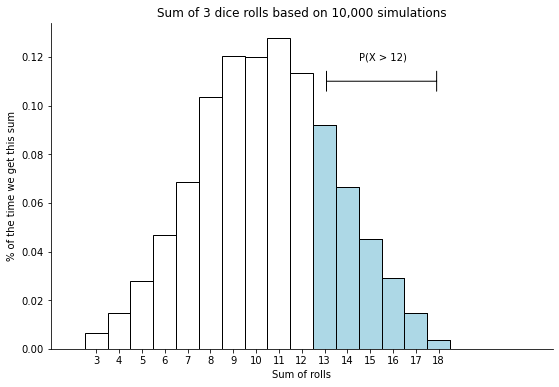

In [29]:
viz.simulation_example1(sums_by_trial)

In [30]:
# Wins greater than 12

wins = sums_by_trial > 12
wins

array([False, False, False, ..., False, False, False])

In [31]:
# To calculate an overall win rate, we can treat each win as a 1 and each loss as 0, then take the average of the array:

win_rate = wins.astype(int).mean()
win_rate

0.2513

In [32]:
# Now that we know our win rate, we can calculate the expected profit:

expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

-1.2304999999999997

In [20]:
# Wins greater or equal to 12

wins = sums_by_trial >= 12
win_rate = wins.astype(int).mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5724999999999998

### EXAMPLE 2: What is the probability of getting at least one 3 in 3 dice rolls?



In [33]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], 
                         nrows * ncols).reshape(nrows, ncols)

(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())

0.42151

> # <u>PROBABILITY DISTRIBUTIONS<u/>

__Probability distributions__ are mathematical functions that we can use to model real-world processes. These distributions provide the probabilities of occurrence of different possible outcomes in an experiment.

#### Examples:
- Uniform --> (__equal likelyhoods__ amont all outcomes, e.g. a fair coin)
- Normal --> (model a __continuous__ random variable.)
- Binomial --> (determining a __binary outcome__ of an event. Success/failure)
- Poisson --> (amount of events occuring __over a time interval__)

In [24]:
# Import stats module
from scipy import stats

## <u>Selecting the Appropriate Distribution Method</u>

##### Given value and want probability: 
    
    - if Continuous Values:
        --> use .pdf
    - if Dicrete Vales:
        --> use .pmf
        
##### Probability of random value takes < than or == to given point:
   
    - if have value and want probability:
        --> use .cdf
    - if have probability & want value:
        --> use .ppf
        
##### Probability random value takes value > than given point:
    
    - If have value and want probability:
        --> use .sf
    - If have probability and want values:
        --> use .isf

In [58]:
# Create random dice distribution values

dice_dist = stats.randint(1, 7)
dice_dist.rvs()

2

In [61]:
# Dice Array

dice_dist.rvs([5, 5])

array([[6, 3, 6, 5, 3],
       [6, 1, 4, 4, 4],
       [3, 2, 2, 3, 4],
       [6, 5, 3, 5, 2],
       [2, 4, 1, 5, 1]])

## (A). UNIFORM DISTRIBUTION

- The uniform distribution can be used to __model events where the outcome is discrete and each outcome has an equally likely chance of happening.__

- Example of an event that can be modeled with the uniform distribution is the outcome of rolling a 6-sided die.

### Probability Mass Function (pmf)  ---- discrete distributions
### Probability Density Function (pdf) ---- continuous distributions
- Gives us the probability of any single outcome.

In [62]:
# Probability mass function for getting 3

dice_dist.pmf(3)

0.16666666666666666

In [70]:
# Probability mass function for getting 1, or 2, or 3

dice_dist.pmf([1, 2, 3])

array([0.16666667, 0.16666667, 0.16666667])

### Cumulative Density Function 
- Tells us the likelihood of a single outcome or all the results below it.

In [69]:
# what is the probability of rolling a 3 or lower?

dice_dist.cdf(3)

0.5

### Percent Point Function (ppf) (also known as the quantile function) 

- Can be thought of as the inverse of the cdf.
- Gives us the value that is associate with that probability

In [68]:
dice_dist.ppf(5/6)

5.0

### Survival Function (sf) 

- Tells us what the probability of our random variable falling above a certain value is. 
- This is the same as 1 minus the cdf of the same value.



In [73]:
# What is the likelihood we roll a value higher than 4?

dice_dist.sf(4)


0.33333333333333337

### Inverse Survival Function (isf) 
- Give us a value when we provide a probability.

In [77]:
# There is a 1/3 chance a dice roll will be higher than what value?

dice_dist.isf(1/3)


4.0

## (B). BINOMIAL DISTRIBUTION
- Binomial distribution lets us model the __number of successes after a number of trials, given a certain probability of success.__ 
- Example of this is the number of heads you would expect to see after flipping a coin a certain number of times.


### Example:
- ##### Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [78]:
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


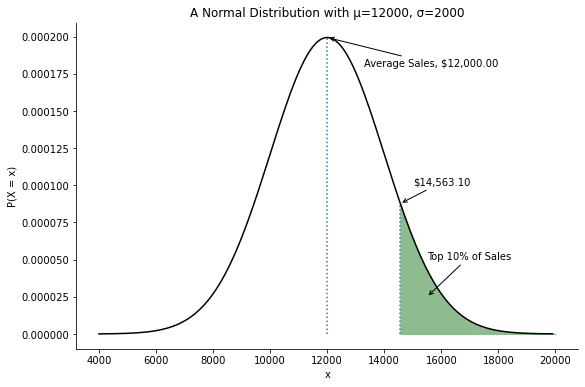

In [79]:
viz.distributions_example7(μ, σ)

- ##### How likely is it that the store sells less than 10,000 dollars one day?



In [84]:
p = sales.cdf(10_000)

print(f'Ony any given day, there\'s a {p:.1%} chance we sell less than $10,000.')

Ony any given day, there's a 15.9% chance we sell less than $10,000.


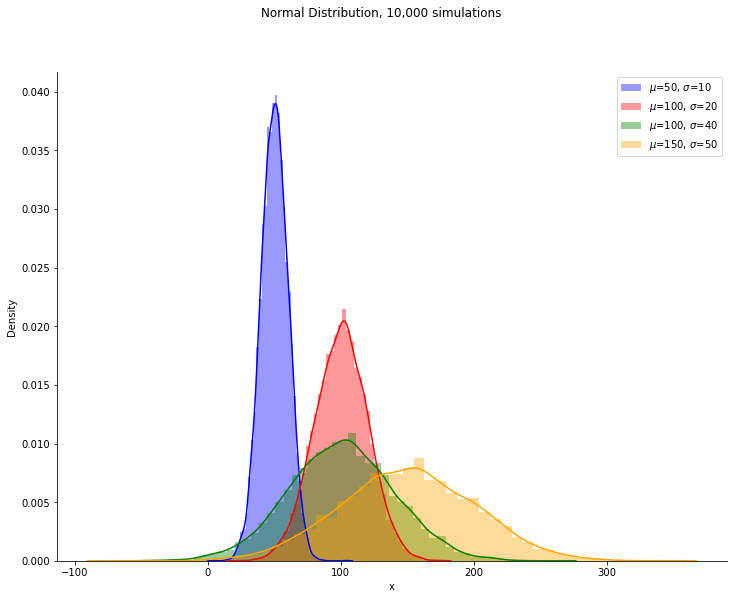

In [85]:
viz.distributions_example8()

## (C). POISSON DISTRIBUTION
- Poisson distribution lets us model a situation where a certain number of events happen over a specified time interval1. 
- Number of events that happen is a discrete measure.
- __This distribution can tell us the likelihood of a certain number of events occuring over the time period.__

- Assumes that the events are indpendent of each other and independent of the time since the last event. 

### Example:
- ##### Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?


In [87]:
stats.poisson(5).pmf(3)

0.1403738958142805

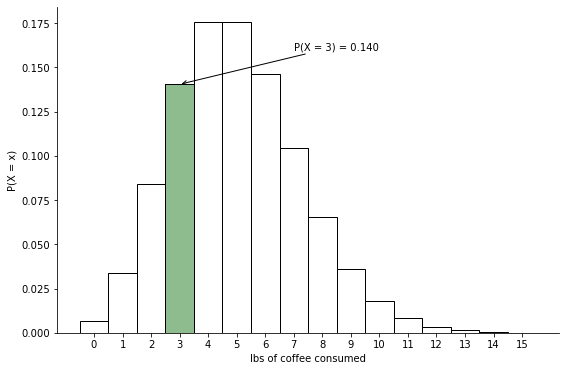

In [88]:
viz.distributions_example10()

##### What is the likelihood that more than 7 lbs of coffee are consumed?



In [89]:
stats.poisson(5).sf(7)

0.13337167407000744

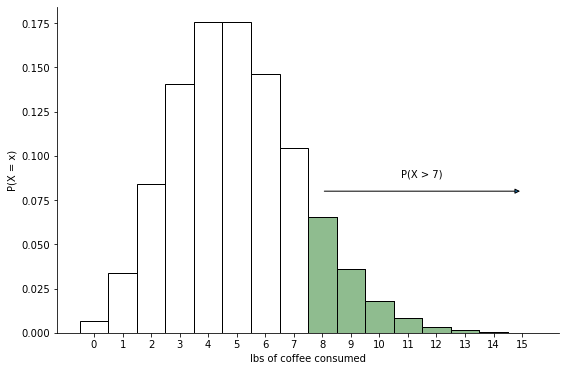

In [90]:
viz.distributions_example11()

> # <u>HYPOTHESIS TESTING</u>

- ##### The process of comparing one hypothesis to another, and using statistics to help evaluate the hypothesis. (Inferential Statistics).


- Ho --> Null hypothesis
- H1 or Ha --> Alternate hypothesis
- Alpha --> Significance level (False +ve rate)
- 1 - beta --> Statistical power
- Beta --> False Negative Rate
- P-value --> Result due to chance

## Parametric Vs Non-Parametric

- parametric tests rely on a distribution